<a href="https://colab.research.google.com/github/rbrtstrk28/machine-learning/blob/main/Assignment_1_Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Recognize a Digit using Machine Learning


## Step 1: Import Libraries
We import TensorFlow and other required modules.


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


## Step 2: Load and Preprocess Data
We normalize the images and convert the labels into one-hot encoding.


In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("Train shape:", train_images.shape)
print("Test shape:", test_images.shape)


Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


## Step 3: Build the Model
We use a Convolutional Neural Network (CNN) for image classification.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 4: Compile the Model
We use Adam optimizer and categorical cross-entropy loss.


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
## Step 5: Train the Model
We train the model on training data for 5 epochs.


In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8754 - loss: 0.4351 - val_accuracy: 0.9817 - val_loss: 0.0763
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9763 - loss: 0.0817 - val_accuracy: 0.9842 - val_loss: 0.0601
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9839 - loss: 0.0536 - val_accuracy: 0.9870 - val_loss: 0.0483
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9886 - loss: 0.0361 - val_accuracy: 0.9880 - val_loss: 0.0457
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9916 - loss: 0.0273 - val_accuracy: 0.9887 - val_loss: 0.0468


## Step 6: Evaluate the Model
We test the accuracy on unseen test data.


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9786 - loss: 0.0579
Test Accuracy: 0.9840999841690063


## Step 7: Upload Handwritten Digit Image
We'll now test if the model can recognize our own handwritten digits. First, we upload an image (e.g., `my_digit.png`) written on paper or drawn digitally.


In [29]:
from google.colab import files
uploaded = files.upload()


Saving 3.jpg to 3.jpg


## Step 8: Preprocess the Uploaded Image
We need to convert the uploaded image into the same format as the MNIST digits:
- Resize to 28x28 pixels
- Invert colors (if needed)
- Normalize pixel values
- Reshape to match model input


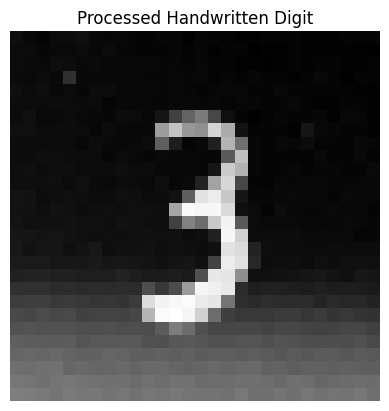

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded file name
file_name = next(iter(uploaded))

# Load the image in grayscale
img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# ✅ Resize to 28x28 (this line is important – DO NOT make it 140x140!)
img = cv2.resize(img, (28, 28))

# Invert colors if needed
img = 255 - img

# Normalize
img = img.astype('float32') / 255.0

# Reshape to match model input
img = img.reshape(1, 28, 28, 1)

# Show image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title("Processed Handwritten Digit")
plt.axis('off')
plt.show()


## Step 9: Predict the Handwritten Digit
Now we feed the preprocessed image into the trained model and let it predict what digit it sees.


In [32]:
# Predict using the trained CNN model
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

print(" The model predicts your digit is:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
 The model predicts your digit is: 3


## Conclusion
We successfully trained a Convolutional Neural Network to recognize handwritten digits and even tested it on a digit we wrote ourselves. The model performs well and generalizes to new inputs.
